# Case Study
## Sentiment Based Product Recommendation System
**Author : Sarika Srivastava**

In [2]:
#importing relevant libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
#import nltk libraries for NLP
import nltk
from nltk.corpus import stopwords
from nltk  import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

In [161]:
# To show all the columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 300)

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [232]:
#import libraries for model evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold

In [3]:
#set the print options to view dataset properly

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format # to display upto 2 decimal places

In [126]:
data = pd.read_csv("sample30.csv")

In [127]:
data.shape

(30000, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
data.describe()

,reviews_rating
count,30000.00
mean,4.48
std,0.99
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


## Data Cleaning

In [128]:
round(data.isna().sum()/len(data.index)*100,2)

id                      0.00
brand                   0.00
categories              0.00
manufacturer            0.47
name                    0.00
reviews_date            0.15
reviews_didPurchase    46.89
reviews_doRecommend     8.57
reviews_rating          0.00
reviews_text            0.00
reviews_title           0.63
reviews_userCity       93.57
reviews_userProvince   99.43
reviews_username        0.21
user_sentiment          0.00
dtype: float64

**We can see there are 2 columns with missing values more than 90% , City name and Province name of the user. Since we do not need them so we can drop them**

In [130]:
drop_column = ['reviews_userCity','reviews_userProvince']

**There are 2 columns reviews_didPurchase and reviews_doRecommend which are of no use so we can drop them**

In [131]:
drop_column.append('reviews_didPurchase')
drop_column.append('reviews_doRecommend')

In [132]:
#drop columns with the missing value more than 90%
data.drop(columns =drop_column,inplace = True)

In [133]:
#check the missing value again
round(data.isna().sum()/len(data.index)*100,2)

id                 0.00
brand              0.00
categories         0.00
manufacturer       0.47
name               0.00
reviews_date       0.15
reviews_rating     0.00
reviews_text       0.00
reviews_title      0.63
reviews_username   0.21
user_sentiment     0.00
dtype: float64

**Rest of the columns with missing values, we will drop those rows**

In [135]:
data.dropna(subset = ['manufacturer','reviews_date','reviews_title','reviews_username'],inplace = True)

In [138]:
#check the missing value again
round(data.isna().sum()/len(data.index)*100,2)

id                 0.00
brand              0.00
categories         0.00
manufacturer       0.00
name               0.00
reviews_date       0.00
reviews_rating     0.00
reviews_text       0.00
reviews_title      0.00
reviews_username   0.00
user_sentiment     0.00
dtype: float64

In [136]:
data.shape

(29567, 11)

In [137]:
#check number of unique values in each column
for i in data.columns:
    print(i,': ',data[i].nunique())

id :  249
brand :  197
categories :  249
manufacturer :  211
name :  249
reviews_date :  6663
reviews_rating :  5
reviews_text :  26862
reviews_title :  18386
reviews_username :  24633
user_sentiment :  2


In [139]:
data.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment'], dtype='object')

**user_sentiment is our target variable. This is a binaru variable so we will convert it into numerical form**

In [141]:
#Positive to 1 and Negative to 0
data['user_sentiment']=data['user_sentiment'].apply(lambda x: 1 if x== 'Positive' else 0)

In [143]:
data.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor. This review was collected as part...,Good,dorothy w,1


### EDA

<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

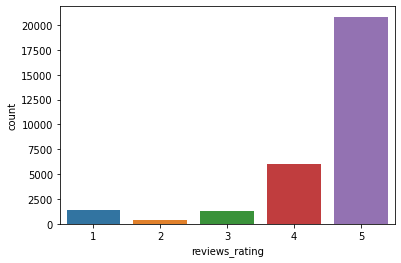

In [80]:
# we will check the rating distribution
sns.countplot(data=data, x='reviews_rating')

**We can see above that many users have given a rating of 5 to products followed by 4 and 3 whereas very few users have given a low rating of 1 or 2.**

c:\users\sarika\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


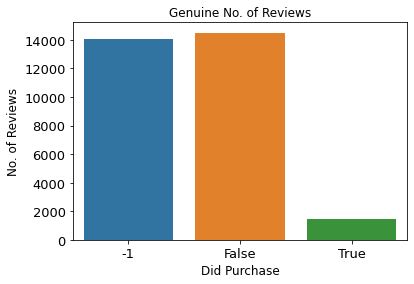

In [78]:
# lets check the genuine number of reviews i.e. the reviews for which product was actually purchased
plt.figure()
ax = sns.countplot(data['reviews_didPurchase'])
ax.set_xlabel(xlabel="Did Purchase", fontsize=12)
ax.set_ylabel(ylabel='No. of Reviews', fontsize=12)
ax.axes.set_title('Genuine No. of Reviews', fontsize=12)
ax.tick_params(labelsize=13)

**We can see very less people has purchased the item and reviewed also.**

<AxesSubplot:xlabel='user_sentiment', ylabel='count'>

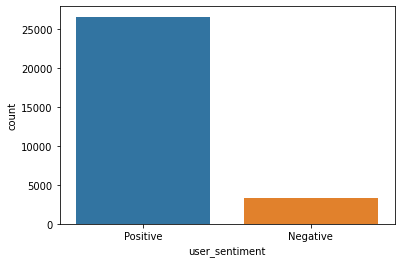

In [81]:
sns.countplot(data=data, x='user_sentiment')

We can see most of the users have given positive reviews

**Lets check which are the top 10 most rated products**

In [114]:
data[data['reviews_didPurchase'] == True]['name'].value_counts()[0:10]

Hormel Chili, No Beans                                                91
Coty Airspun Face Powder, Translucent Extra Coverage                  87
Chester's Cheese Flavored Puffcorn Snacks                             77
Tostitos Bite Size Tortilla Chips                                     59
Lysol Concentrate Deodorizing Cleaner, Original Scent                 55
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks                    52
Bisquick Original Pancake And Baking Mix - 40oz                       46
Red (special Edition) (dvdvideo)                                      41
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz    41
Bounce Dryer Sheets, Fresh Linen, 160 sheets                          36
Name: name, dtype: int64

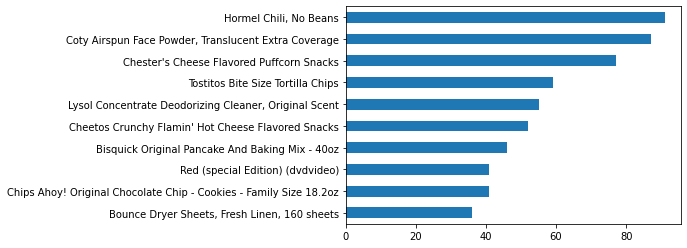

In [111]:
data[data['reviews_didPurchase'] == True]['name'].value_counts()[0:10].plot(kind = 'barh').invert_yaxis()

<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

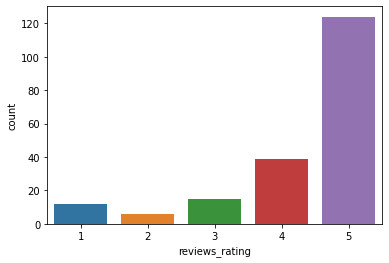

In [116]:
df = data[data['name']=="Hormel Chili, No Beans"]
sns.countplot(data=df, x='reviews_rating')

**Target value distribution**

<AxesSubplot:xlabel='user_sentiment', ylabel='count'>

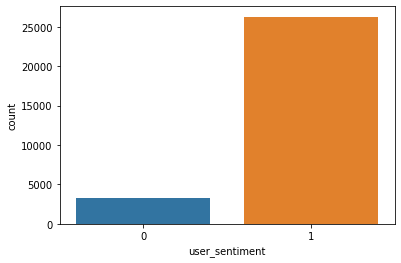

In [165]:
sns.countplot(data=data, x='user_sentiment')

**We can see the data is highly imbalanced**
**We will perform some sampling to reslove this issue later during ML algorithm**

## Text preprocessing

**As the review is mostly text data, we might need to preprocess the data to gain some useful insights from the data**

**For prediction, we dont need all columns, we need reviews title, review text and user_sentiment.**
**We can either keep review_title and review_text seperately or we can combine both**
**I will combine the two columns**

In [146]:
# Joining Review Text and Title.
data['Review'] = data['reviews_title'] + " " + data['reviews_text'] 

In [147]:
#lets have a look at few random reviews
for i in range(0,30,5):
    print(data['Review'][i])
    print("**********")

Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
**********
Not worth it My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.
**********
pretty dissapoitned tried it with my husband and felt no different there was no effect no change first te using ky gel not sure if i want to try any others...
**********
Not what I expected I bought this and tried this with my wife but we did not enjoy it ..we did not feel anything enhancement with this product at all such as the his-her product.
**********
We love it! I noticed this product on clearance at a store I shop frequently and decided to give it a try. My hu

In [148]:
# Clean the reviews    
data['cleaned_text'] = data['Review'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
data['cleaned_text'] = data['cleaned_text'].replace("  ", " ")


In [149]:
words_remove = ["ax","i","you","edu","s","t","m","subject","can","lines","re","what", "there","all","we",
                "one","the","a","an","of","or","in","for","by","on","but","is","in","a","not","with","as",
                "was","if","they","are","this","and","it","have","has","from","at","my","be","by","not","that","to",
                "from","com","org","like","likes","so","said","from","what","told","over","more","other",
                "have","last","with","this","that","such","when","been","says","will","also","where","why",
                "would","today", "in", "on", "you", "r", "d", "u", "hw","wat", "oly", "s", "b", "ht", 
                "rt", "p","the","th", "n", "was"]


def cleantext(data, words_to_remove = words_remove): 
    # remove emoticons form the reviews if any
    data['cleaned_text'] = data['cleaned_text'].replace(r'<ed>','', regex = True)
    data['cleaned_text'] = data['cleaned_text'].replace(r'\B<U+.*>|<U+.*>\B|<U+.*>','', regex = True)
    
    # convert reviews to lowercase
    data['cleaned_text'] = data['cleaned_text'].str.lower()
            
    #remove_symbols if any
    data['cleaned_text'] = data['cleaned_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    data['cleaned_text'] = data['cleaned_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)

    
    #remove words of length 1 or 2 
    data['cleaned_text'] = data['cleaned_text'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)

    #remove extra spaces in the review
    data['cleaned_text'] = data['cleaned_text'].replace(r'^\s+|\s+$'," ", regex=True)
     
    #remove_digits
    data['cleaned_text'] = data['cleaned_text'].replace(r'[0-9]', "", regex=True)
    
    #remove stopwords and words_to_remove
    stop_words = set(stopwords.words('english'))
    mystopwords = [stop_words, "via", words_to_remove]
    
    data['fully_cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in mystopwords]))
    
    return data

#get the processed reviews
data = cleantext(data)

In [150]:
data.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment', 'Review', 'cleaned_text', 'fully_cleaned_text'], dtype='object')

In [151]:
#lets have a look at few random cleaned reviews
for i in range(0,30,5):
    print(data['fully_cleaned_text'][i])
    print("**********")

just awesome love this album its very good more the hip hop side than her current pop sound hype listen this everyday the gym give star rating all the way her metaphors are just crazy
**********
not worth boyfriend and bought this spice things the bedroom and were both highly disappointed this product bought this one because absolutely love the yours and mine and thought this would have similar affect but did absolutely nothing not buy
**********
pretty dissapoitned tried with husband and felt different there was effect change first using gel not sure want try any others
**********
not what expected bought this and tried this with wife but did not enjoy did not feel anything enhancement with this product all such the hisher product
**********
love noticed this product clearance store shop frequently and decided give try husband and love went back and bought every box left like others have mentioned not sure what supposed other than lubricant but for that purpose like much better than r

**Now will perform below operations over the review text :**<br>
**1. Tokenization**<br>
**2. Normalizing Words(Lemma or Stemming)**<br>

In [152]:
data['review_token'] = data['fully_cleaned_text'].apply(word_tokenize)
data.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,Review,cleaned_text,fully_cleaned_text,review_token
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,Just Awesome i love this album. it's very good...,just awesome love this album its very good mo...,just awesome love this album its very good mor...,"[just, awesome, love, this, album, its, very, ..."
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor. This review was collected as part...,Good,dorothy w,1,Good Good flavor. This review was collected as...,good good flavor this review was collected pa...,good good flavor this review was collected par...,"[good, good, flavor, this, review, was, collec..."


**We will use lemmatization, but we cannot do this without POS tagging, so created a function to return the lemmetizor tags and then return the lemma of the word list**

In [153]:
lemmatizer = WordNetLemmatizer()

In [154]:
def get_wordnet_pos(treebank_tag):
    #return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
        
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
            # As default pos in lemmatization is Noun
        return wordnet.NOUN

def pos_tag_1(tokens):
        # find the pos tagginf for each tokens [('What', 'WP'), ('can', 'MD'), ('I', 'PRP') ....
    lemma = []
    for word, tag in pos_tag(tokens):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma.append(word)
        else:
            lemma.append(lemmatizer.lemmatize(word, wntag))
    return lemma

In [155]:
data['text_lemmatized'] = data.review_token.apply(lambda x: pos_tag_1(x))

In [156]:
data[['review_token','text_lemmatized']]

,review_token,text_lemmatized
0,"[just, awesome, love, this, album, its, very, ...","[just, awesome, love, this, album, its, very, ..."
1,"[good, good, flavor, this, review, was, collec...","[good, good, flavor, this, review, be, collect..."
2,"[good, good, flavor]","[good, good, flavor]"
3,"[disappointed, read, through, the, reviews, he...","[disappoint, read, through, the, review, here,..."
4,"[irritation, husband, bought, this, gel, for, ...","[irritation, husband, buy, this, gel, for, the..."
...,...,...
29995,"[softness, got, this, conditioner, with, influ...","[softness, get, this, conditioner, with, influ..."
29996,"[love, love, received, this, for, review, purp...","[love, love, receive, this, for, review, purpo..."
29997,"[hair, smooth, after, use, first, all, love, t...","[hair, smooth, after, use, first, all, love, t..."
29998,"[perfect, for, oily, hair, received, this, thr...","[perfect, for, oily, hair, receive, this, thro..."


In [157]:
#At last we will join all the lemmatized words to create a final review for furthur process
data['final_review'] = data['text_lemmatized'].apply(lambda x: ' '.join(word for word in x))

In [162]:
data['final_review'].head()

0                                                                                                                          just awesome love this album its very good more the hip hop side than her current pop sound hype listen this everyday the gym give star rating all the way her metaphor be just crazy
1                                                                                                                                                                                                                                                         good good flavor this review be collect part promotion
2                                                                                                                                                                                                                                                                                               good good flavor
3    disappoint read through the review here before look buy one the couple lubricant

**Before Feature Extraction, we will split the data into train and test**

In [163]:
data.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment', 'Review', 'cleaned_text', 'fully_cleaned_text', 'review_token', 'text_lemmatized', 'final_review'], dtype='object')

### Feature Extraction - Tfidf

In [164]:
x=data['final_review'] 
y=data['user_sentiment']

In [166]:
# Split the dataset into test and train
seed = 50 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [ ]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',     
    analyzer='word',            # ngrams will be of words
    token_pattern=r'\w{1,}',    
    ngram_range=(1, 3),         
    stop_words='english',
    sublinear_tf=True)

In [169]:
# we will fit_transform X_train and only transform X_test
X_train_tfidf = word_vectorizer.fit_transform(X_train)
X_test_tfidf = word_vectorizer.transform(X_test)

In [170]:
# Print the shape of train and test dataset
print('X_train', X_train_tfidf.shape)
print('y_train', y_train.shape)
print('X_test', X_test_tfidf.shape)
print('y_test', y_test.shape)

X_train (20696, 378946)
y_train (20696,)
X_test (8871, 378946)
y_test (8871,)


In [196]:
#create a function for plotting confusion matrix

def cm_plot(cm_train,cm_test):
    
    print("Confusion matrix for train and test data set")

    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.heatmap(cm_train/np.sum(cm_train), annot=True , fmt = ' .2%',cmap="PiYG")
    

    plt.subplot(1,2,2)
    sns.heatmap(cm_test/np.sum(cm_test), annot=True , fmt = ' .2%',cmap="PiYG")

    plt.show()

In [206]:
#create a function for calculating Sensitivity and Specificity
def spec_sensitivity(cm_train,cm_test):
    
    #Train
    tn, fp, fn, tp = cm_train.ravel()
    specificity_train = tn / (tn+fp)
    sensitivity_train = tp / float(fn + tp)
    
    print("sensitivity for train set: ",sensitivity_train)
    print("specificity for train set: ",specificity_train)
    print("\n****\n")
    
    #Test
    tn, fp, fn, tp = cm_test.ravel()
    specificity_test = tn / (tn+fp)
    sensitivity_test = tp / float(fn + tp)
    
    print("sensitivity for test set: ",sensitivity_test)
    print("specificity for train set: ",specificity_test)

### Training a text classification model

**Before training the text classification, we will do some sampling because in EDA we saw the target data is highly imbalanced**<br>**There are two techniques for sampling :**<br>
**1. Oversampling**<br>
**2. SMOTE**

In [171]:
#from imblearn import over_sampling
from imblearn import over_sampling
over = over_sampling.RandomOverSampler(random_state=0)

In [172]:
# Oversampling the dataset.
X_train, y_train = over.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))

In [173]:
pd.Series(y_train).value_counts()

0    18399
1    18399
Name: user_sentiment, dtype: int64

In [174]:
# we convert the 2D array to a dataframe and then convert it to a list.
X_train = pd.DataFrame(X_train).iloc[:,0].tolist()

In [175]:
# transforming the train and test datasets

X_train_transformed = word_vectorizer.transform(X_train)
X_test_transformed = word_vectorizer.transform(X_test.tolist())

## Logistic Regression

In [176]:
# Building Logistic Regression
t1 = time.time()

cls_log = LogisticRegression()
cls_log.fit(X_train_transformed,y_train)

t2 = time.time()
print('Time Taken: {:.2f} seconds'.format(t2-t1))

Time Taken: 5.58 seconds


**Model Accuracy on train data**

In [181]:
y_train_pred_logit = cls_log.predict(X_train_transformed)

print("Logistic Regression accuracy on train data", accuracy_score(y_train_pred_logit, y_train),"\n")
print(classification_report(y_train_pred_logit, y_train))

Logistic Regression accuracy on train data 0.9885591608239578 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18732
           1       0.98      1.00      0.99     18066

    accuracy                           0.99     36798
   macro avg       0.99      0.99      0.99     36798
weighted avg       0.99      0.99      0.99     36798



**Model Accuracy on test data**

In [182]:
y_test_pred_logit = cls_log.predict(X_test_transformed)

print("Logistic Regression accuracy on test data", accuracy_score(y_test_pred_logit, y_test),"\n")
print(classification_report(y_test_pred_logit, y_test))

Logistic Regression accuracy on test data 0.9120730470071018 

              precision    recall  f1-score   support

           0       0.55      0.63      0.59       878
           1       0.96      0.94      0.95      7993

    accuracy                           0.91      8871
   macro avg       0.75      0.79      0.77      8871
weighted avg       0.92      0.91      0.91      8871



**We can see the Maxro AVg is 77%**

In [ ]:
cm_train = metrics.confusion_matrix(y_train, y_train_pred_logit)
cm_test = metrics.confusion_matrix(y_test, y_test_pred_logit)

In [205]:
spec_sensitivity(cm_train,cm_test)

sensitivity for train set:  0.9795097559649981
specificity for train set:  0.9976085656829176

****

sensitivity for test set:  0.9586671753783543
specificity for train set:  0.5486111111111112


Confusion matrix for train and test data set


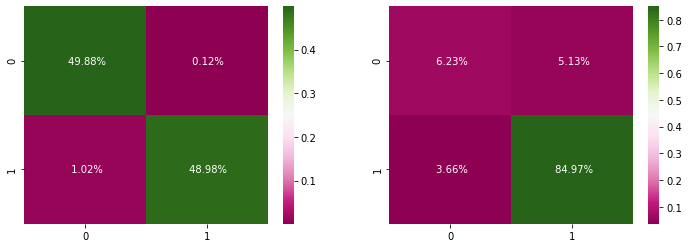

In [198]:
cm_plot(cm_train,cm_test)

# Recommendation System

**Now we will move to Recommendation system.**<br>**For this we will first recognise relevant columns out of all columns**

In [241]:
# recognize relevant columns
data.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username', 'user_sentiment', 'Review', 'cleaned_text', 'fully_cleaned_text', 'review_token', 'text_lemmatized', 'final_review'], dtype='object')

**We need below columns**<br>
**1. reviews_username -- The unique identification for individual user in the dataset**<br>
**2. reviews_rating -- Rating given by the user to a particular product**<br>
**3. name -- Name of the product to which user has added review or rating**

In [242]:
#we will create a new dataframe with above columns

data_recom = data[['reviews_username','reviews_rating','name']]

In [243]:
data_recom.head(5)

,reviews_username,reviews_rating,name
0,joshua,5,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
2,dorothy w,5,Lundberg Organic Cinnamon Toast Rice Cakes
3,rebecca,1,K-Y Love Sensuality Pleasure Gel
4,walker557,1,K-Y Love Sensuality Pleasure Gel


**We will divide the dataset into train and test**

In [244]:
train, test = train_test_split(data_recom, test_size=0.30, random_state=31)

**Creating dummy train & dummy test dataset**

These dataset will be used for prediction 
- Dummy train will be used later for prediction of the product which has not been rated by the user. To ignore the product rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [245]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [246]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [247]:
dummy_train.head()

,reviews_username,reviews_rating,name
21180,bru1,0,Nexxus Exxtra Gel Style Creation Sculptor
18673,debbie1032,0,Clorox Disinfecting Bathroom Cleaner
19911,diana915,0,Clorox Disinfecting Bathroom Cleaner
25153,hollywood,0,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd
9774,ultra615,0,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total


In [249]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [250]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,"Heinz Tomato Ketchup, 38oz",Heiress (dvd),Herr's Baked Cheese Curls,High-Dome Floor Door Stop,Hollywood Beauty Olive Cholesterol,Holmes174 Personal Indoor He

### User Similarity Matrix¶

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.


In [251]:
# Create a user-movie matrix.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [252]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [253]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,"Heinz Tomato Ketchup, 38oz",Heiress (dvd),Herr's Baked Cheese Curls,High-Dome Floor Door Stop,Hollywood Beauty Olive Cholesterol,Holmes174 Personal Indoor He

In [254]:
from sklearn.metrics.pairwise import pairwise_distances

In [255]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [256]:
np.shape(user_correlation)

(18083, 18083)

### Prediction - User User

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0.

In [257]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for movies rated as well as not rated) is the weighted sum of correlation with the movie rating (as present in the rating dataset).

In [258]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [259]:
user_predicted_ratings.shape

(18083, 232)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [260]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,"Heinz Tomato Ketchup, 38oz",Heiress (dvd),Herr's Baked Cheese Curls,High-Dome Floor Door Stop,Hollywood Beauty Olive Cholesterol,Holmes174 Personal Indoor He

### Evaluation - User User

Evaluation will be same as we have seen above for the prediction. The only difference being, we will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [263]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2036, 3)

In [264]:
common.head()

,reviews_username,reviews_rating,name
13271,ladyrebel,5,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total
6802,lupi2010,4,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total
29319,tifflet10,4,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz
29003,ivywxy,3,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz
10548,catherine4155,5,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total


In [265]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [266]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [267]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Cal Lighting Led Dark Bronze Finish Metal Piano Lamp,Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1,"Heinz Tomato Ketchup, 38oz",Heiress (dvd),Herr's Baked Cheese Curls,High-Dome Floor Door Stop,Hollywood Beauty Olive Cholesterol,Holmes174 Personal Indoor He

In [268]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,17983,17984,17985,17986,17987,17988,17989,17990,17991,17992,17993,17994,17995,17996,17997,17998,17999,18000,18001,18002,18003,18004,18005,18006,18007,18008,18009,18010,18011,18012,18013,18014,18015,18016,18017,18018,18019,18020,18021,18022,18023,18024,18025,18026,18027,18028,18029,18030,18031,18032,18033,18034,18035,18036,18037,18038,18039,18040,18041,18042,18043,18044,18045,18046,18047,18048,18049,18050,18051,18052,18053,18054,18055,18056,18057,18058,18059,18060,18061,18062,18063,18064,18065,18066,18067,18068,18069,18070,18071,18072,18073,18074,18075,18076,18077,18078,18079,18080,18081,18082
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
01impala,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
02dakota,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [269]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [270]:
user_correlation_df_1.shape

(1704, 18083)

In [271]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [272]:
user_correlation_df_3 = user_correlation_df_2.T

In [273]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [274]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [275]:
dummy_test.shape

(1704, 118)

In [276]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [277]:
common_user_predicted_ratings.head(2)

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""","All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium","Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bilbao Nightstand Gray Oak - South Shore,Bisquick Original Pancake And Baking Mix - 40oz,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Hollywood Beauty Olive Cholesterol,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans","Iman Second To None Stick Foundation, Clay 1",J.a. Henckels International 4-Pc Everedge Plus Steak Knife Set,Jason Aldean - They Don't Know,"Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And Sheet Set (twin) Aqua - 7pc,Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,L'oreal Paris Advanced Hairstyle Boost It High Lift Creation Spray,"L'oreal Paris Visible Lift Smooth Absolute, Natural Buff",Little Bedding By Nojo Jungle Dreams 2 Pack Sheet Set,"Lundberg Wehani Rice, 25lb","Lysol Concentrate Deodorizing Cleaner, Original Scent",Meguiar's Deep Crystal Car Wash 64-Oz.,Meguiar's Ultimate Quik Detailer 22-Oz.,Mike Dave Need Wedding Dates (dvd + Digital),Mrs. Meyer's Lemon Verbena Surface Scrub,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,"Musselman Apple Sauce, Cinnamon, 48oz",My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),Nearly Natural 5.5' Bamboo W/decorative Planter,Nexxus Exxtra Gel Style Creation Sculptor,Noosa Honey Yogurt,"Ogx Conditioner, Hydrating Teatree Mint",Olay Regenerist Deep Hydration Regenerating Cream,Orajel Maximum Strength Toothache Pain Relief Liquid,Pantene Pro-V Expert Collection Age Defy Conditioner,"Pendaflex174 Divide It Up File Folder, Multi Section, 

Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [278]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [279]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [280]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [281]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.340207963097575


In [314]:
# save the respective files Pickle 
import pickle
pickle.dump(user_final_rating,open('user_final_rating.pkl','wb'))
user_final_rating =  pickle.load(open('user_final_rating.pkl', 'rb'))

## Recommendation

In [318]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user namejoshua
joshua


### Finding the top 20 recommendation for the user

In [319]:
# Recommending the Top 5 products to the user.
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   7.55
Tostitos Bite Size Tortilla Chips                                                 4.67
Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular                           3.33
Pleasant Hearth Diamond Fireplace Screen - Espresso                               3.33
Chester's Cheese Flavored Puffcorn Snacks                                         2.93
Clorox Disinfecting Bathroom Cleaner                                              2.93
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                      2.89
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         2.89
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)                     2.89
Reebok Classic Leather Running Shoes - White (Men)                                2.89
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                             2.89
My Big Fat Greek Wedding 2 (blu-Ray + 

**Filtering out the Top 5 recommendation items based on Logistic Regression ML model.**

In [320]:
# save the respective files and models through Pickle 
import pickle
pickle.dump(cls_log,open('logit_model.pkl', 'wb'))
# loading pickle object
cls_log =  pickle.load(open('logit_model.pkl', 'rb'))

pickle.dump(word_vectorizer,open('word_vectorizer.pkl','wb'))
# loading pickle object
word_vectorizer = pickle.load(open('word_vectorizer.pkl','rb'))

In [325]:
# Define a function to recommend top 5 filtered products to the user.
def recommend(user_input):
    d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]

    # Based on positive sentiment percentage.
    i= 0
    a = {}
    for prod_name in d.index.tolist():
        product = prod_name
        product_name_review_list =data[data['name']== product]['final_review'].tolist()
        features= word_vectorizer.transform(product_name_review_list)
        cls_log.predict(features)
        a[product] = cls_log.predict(features).mean()*100
    b= pd.Series(a).sort_values(ascending = False).head(5).index.tolist()
    print("Username : ",user_input,'\n**************************\n')
    print("Top 5 product recommendation you may like :")
    for i,val in enumerate(b):
        print(i+1,val)

In [326]:
recommend(user_input)

['Reebok Classic Leather Running Shoes - White (Men)', 'Pink Friday: Roman Reloaded Re-Up (w/dvd)', 'Pleasant Hearth Diamond Fireplace Screen - Espresso', 'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)', "Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)"]


In [ ]:
data.to_csv("data.csv",index=False)